# NN WITH RMS 

Epoch 10/100, Training Loss: 0.025882835900108467, Validation Loss: 0.026512728083927954
Epoch 20/100, Training Loss: 0.012976673574325146, Validation Loss: 0.02138075119148391
Epoch 30/100, Training Loss: 0.009121497033766534, Validation Loss: 0.023709455462900535
Epoch 40/100, Training Loss: 0.007215296374981897, Validation Loss: 0.025638695571259702
Epoch 50/100, Training Loss: 0.006162881927264756, Validation Loss: 0.02697299313463095
Epoch 60/100, Training Loss: 0.005404540427027565, Validation Loss: 0.02844832758894378
Epoch 70/100, Training Loss: 0.00473720551172752, Validation Loss: 0.030086382738165256
Epoch 80/100, Training Loss: 0.004213957584854835, Validation Loss: 0.03133739524413398
Epoch 90/100, Training Loss: 0.0038103926592413006, Validation Loss: 0.03211904939042089
Epoch 100/100, Training Loss: 0.003478111477955466, Validation Loss: 0.03241813178755578


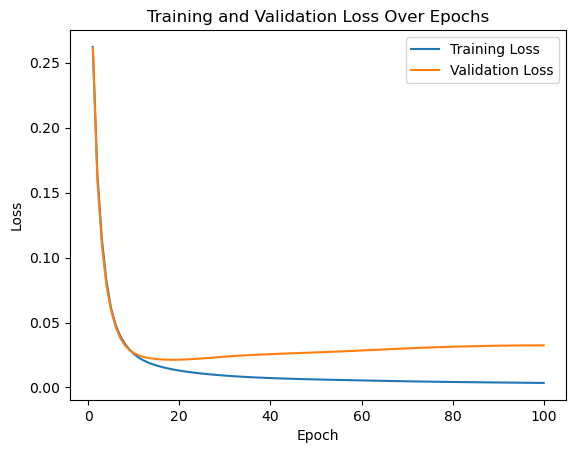

Train Accuracy: 0.9974874371859297
Test Accuracy: 0.9767441860465116


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros(hidden_size)  # Corrected shape
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros(output_size)
        self.cache_weights1 = np.zeros((input_size, hidden_size))
        self.cache_bias1 = np.zeros(hidden_size)
        self.cache_weights2 = np.zeros((hidden_size, output_size))
        self.cache_bias2 = np.zeros(output_size)
        self.epsilon = 1e-8
        self.losses_train = []  # Store training loss values per epoch
        self.losses_val = []   # Store validation loss values per epoch
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.hidden_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights2) + self.bias2)
        return self.output
    
    def backward(self, X, y, output, learning_rate, decay_rate=0.9):
        error = y - output
        delta_output = error * self.sigmoid_derivative(output)
        
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)
        
        # Update cache using RMSprop
        self.cache_weights2 = decay_rate * self.cache_weights2 + (1 - decay_rate) * (self.hidden_output.T.dot(delta_output) ** 2)
        self.cache_bias2 = decay_rate * self.cache_bias2 + (1 - decay_rate) * (np.sum(delta_output, axis=0) ** 2)
        self.cache_weights1 = decay_rate * self.cache_weights1 + (1 - decay_rate) * (X.T.dot(delta_hidden) ** 2)
        self.cache_bias1 = decay_rate * self.cache_bias1 + (1 - decay_rate) * (np.sum(delta_hidden, axis=0) ** 2)
        
        # Update weights and biases using RMSprop
        self.weights2 += (self.hidden_output.T.dot(delta_output) / (np.sqrt(self.cache_weights2) + self.epsilon)) * learning_rate
        self.bias2 += (np.sum(delta_output, axis=0) / (np.sqrt(self.cache_bias2) + self.epsilon)) * learning_rate
        self.weights1 += (X.T.dot(delta_hidden) / (np.sqrt(self.cache_weights1) + self.epsilon)) * learning_rate
        self.bias1 += (np.sum(delta_hidden, axis=0) / (np.sqrt(self.cache_bias1) + self.epsilon)) * learning_rate
        
    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, learning_rate):
        for epoch in range(epochs):
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output, learning_rate)
            
            # Calculate training loss for this epoch and store it
            loss_train = np.mean(np.square(y_train - self.forward(X_train)))
            self.losses_train.append(loss_train)
            
            # Calculate validation loss for this epoch and store it      
            loss_val = np.mean(np.square(y_val - self.forward(X_val)))
            self.losses_val.append(loss_val)
            
            if (epoch+1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss_train}, Validation Loss: {loss_val}')
    
    def predict(self, X):
        return np.round(self.forward(X))

# Set random seed for reproducibility
np.random.seed(42)

# Initialize neural network
input_size = X_train.shape[1]
hidden_size = 6
output_size = 1 # use output_size = 1
learning_rate = 0.01
epochs = 100
batch_size = 32

# Initialize and train the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), epochs, batch_size, learning_rate)

# Plot the training and validation loss over epochs
plt.plot(range(1, epochs+1), model.losses_train, label='Training Loss')
plt.plot(range(1, epochs+1), model.losses_val, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


# ADAGRAD

Epoch 10/100, Train Loss: 0.02937934763760894, Validation Loss: 0.04097157006670344
Epoch 20/100, Train Loss: 0.02360856562345599, Validation Loss: 0.03557627448199905
Epoch 30/100, Train Loss: 0.020830914620313896, Validation Loss: 0.03336240839000154
Epoch 40/100, Train Loss: 0.019049282966396797, Validation Loss: 0.03209128989302325
Epoch 50/100, Train Loss: 0.017749149479449475, Validation Loss: 0.031222929284793068
Epoch 60/100, Train Loss: 0.016730254096875372, Validation Loss: 0.030561650711858415
Epoch 70/100, Train Loss: 0.01589708642367894, Validation Loss: 0.0300240667516449
Epoch 80/100, Train Loss: 0.015197084620474829, Validation Loss: 0.02957171905746499
Epoch 90/100, Train Loss: 0.014597909708926802, Validation Loss: 0.029185231765138393
Epoch 100/100, Train Loss: 0.014077741863969864, Validation Loss: 0.02885284753948665


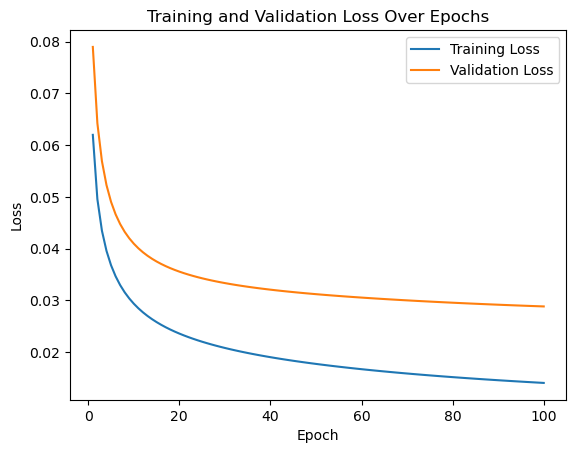

Train Accuracy: 0.9912087912087912
Test Accuracy: 0.9824561403508771


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros((1, output_size))
        self.cache_weights1 = np.zeros((input_size, hidden_size))
        self.cache_bias1 = np.zeros((1, hidden_size))
        self.cache_weights2 = np.zeros((hidden_size, output_size))
        self.cache_bias2 = np.zeros((1, output_size))
        self.epsilon = 1e-8
        self.losses_train = []  # Store training loss values per epoch
        self.losses_val = []   # Store validation loss values per epoch
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.hidden_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights2) + self.bias2)
        return self.output
    
    def backward(self, X, y, output, learning_rate):
        error = y - output
        delta_output = error * self.sigmoid_derivative(output)
        
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)
        
        # Update cache
        self.cache_weights2 += (self.hidden_output.T.dot(delta_output) ** 2)
        self.cache_bias2 += (np.sum(delta_output, axis=0, keepdims=True) ** 2)
        self.cache_weights1 += (X.T.dot(delta_hidden) ** 2)
        self.cache_bias1 += (np.sum(delta_hidden, axis=0, keepdims=True) ** 2)
        
        # Update weights and biases using Adagrad
        self.weights2 += (self.hidden_output.T.dot(delta_output) / (np.sqrt(self.cache_weights2) + self.epsilon)) * learning_rate
        self.bias2 += (np.sum(delta_output, axis=0, keepdims=True) / (np.sqrt(self.cache_bias2) + self.epsilon)) * learning_rate
        self.weights1 += (X.T.dot(delta_hidden) / (np.sqrt(self.cache_weights1) + self.epsilon)) * learning_rate
        self.bias1 += (np.sum(delta_hidden, axis=0, keepdims=True) / (np.sqrt(self.cache_bias1) + self.epsilon)) * learning_rate
        
    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, learning_rate):
        for epoch in range(epochs):
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output, learning_rate)
            
            # Calculate training loss for this epoch and store it
            loss_train = np.mean(np.square(y_train - self.forward(X_train)))
            self.losses_train.append(loss_train)
            
            # Calculate validation loss for this epoch and store it
            loss_val = np.mean(np.square(y_val - self.forward(X_val)))
            self.losses_val.append(loss_val)
            
            if (epoch+1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss_train}, Validation Loss: {loss_val}')
    
    def predict(self, X):
        return np.round(self.forward(X))

# Set random seed for reproducibility
np.random.seed(42)

# Initialize neural network
input_size = X_train.shape[1]
hidden_size = 16
output_size = 1
learning_rate = 0.01
epochs = 100
batch_size = 16

# Initialize and train the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), epochs, batch_size, learning_rate)

# Plot the training and validation loss over epochs
plt.plot(range(1, epochs+1), model.losses_train, label='Training Loss')
plt.plot(range(1, epochs+1), model.losses_val, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
